# 데이터 및 라이브러리 로드

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings 
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
url_train = '/content/drive/MyDrive/Colab Notebooks/data/face_age_detection/train'
url_test = '/content/drive/MyDrive/Colab Notebooks/data/face_age_detection/test'
url_val = '/content/drive/MyDrive/Colab Notebooks/data/face_age_detection/validation'
url_test_young = '/content/drive/MyDrive/Colab Notebooks/data/face_age_detection/test_young'

class_list = ['kid', 'adult']

train = tf.keras.preprocessing.image_dataset_from_directory(
    url_train,
    labels='inferred',
    label_mode='categorical',
    class_names=class_list,
)

test = tf.keras.preprocessing.image_dataset_from_directory(
    url_test,
    labels='inferred',
    label_mode='categorical',
    class_names=class_list,
)

val = tf.keras.preprocessing.image_dataset_from_directory(
    url_val,
    labels='inferred',
    label_mode='categorical',
    class_names=class_list,
)


test_young = tf.keras.preprocessing.image_dataset_from_directory(
    url_test_young,
    labels='inferred',
    label_mode='categorical',
    class_names=class_list,
)


Found 10137 files belonging to 2 classes.
Found 3095 files belonging to 2 classes.
Found 6763 files belonging to 2 classes.
Found 155 files belonging to 2 classes.


In [ ]:
train

<BatchDataset shapes: ((None, 256, 256, 3), (None, 2)), types: (tf.float32, tf.float32)>

# 베이스라인 모델

- 총 2가지의 class (Adult/Kid)이기 때문에 Chance level = 50%이다.

# 모델 구축

In [8]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential

model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='relu'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 128, 128, 64)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 128)     

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train, validation_data=val, epochs=10)

Epoch 1/10
317/317 [==============================] - 77s 239ms/step - loss: nan - accuracy: 0.6830 - val_loss: nan - val_accuracy: 0.7476
Epoch 2/10
317/317 [==============================] - 76s 237ms/step - loss: nan - accuracy: 0.6916 - val_loss: nan - val_accuracy: 0.8004
Epoch 3/10
317/317 [==============================] - 77s 238ms/step - loss: nan - accuracy: 0.6878 - val_loss: nan - val_accuracy: 0.8588
Epoch 4/10
317/317 [==============================] - 77s 239ms/step - loss: nan - accuracy: 0.6898 - val_loss: nan - val_accuracy: 0.8518
Epoch 5/10
317/317 [==============================] - 76s 237ms/step - loss: nan - accuracy: 0.6730 - val_loss: nan - val_accuracy: 0.7226
Epoch 6/10
317/317 [==============================] - 76s 237ms/step - loss: 0.5946 - accuracy: 0.6982 - val_loss: 0.7513 - val_accuracy: 0.6527
Epoch 7/10
317/317 [==============================] - 76s 237ms/step - loss: 0.5732 - accuracy: 0.7182 - val_loss: 0.4942 - val_accuracy: 0.8161
Epoch 8/10
317/

In [10]:
from keras.models import load_model

model.save('model.h5')

## 성능 개선을 위한 두 번째 모델

In [13]:
# 성능을 개선하기 위해 모델 수정

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential

model2 = Sequential()
model2.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(256, 256, 3)))
model2.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

model2.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

model2.add(Conv2D(filters=128, kernel_size=(3,3), padding='Same', activation='relu'))
model2.add(Conv2D(filters=128, kernel_size=(3,3), padding='Same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(2, activation='relu'))
model2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      1

In [14]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist = model2.fit(train, validation_data=val, epochs=10)

Epoch 1/10
317/317 [==============================] - 83s 256ms/step - loss: 0.5551 - accuracy: 0.7599 - val_loss: nan - val_accuracy: 0.6904
Epoch 2/10
317/317 [==============================] - 88s 274ms/step - loss: nan - accuracy: 0.7646 - val_loss: nan - val_accuracy: 0.7560
Epoch 3/10
317/317 [==============================] - 88s 273ms/step - loss: 0.5408 - accuracy: 0.7478 - val_loss: 0.4819 - val_accuracy: 0.7869
Epoch 4/10
317/317 [==============================] - 88s 274ms/step - loss: 0.5155 - accuracy: 0.7617 - val_loss: nan - val_accuracy: 0.6209
Epoch 5/10
317/317 [==============================] - 88s 273ms/step - loss: 0.4757 - accuracy: 0.7904 - val_loss: 0.6491 - val_accuracy: 0.7194
Epoch 6/10
317/317 [==============================] - 88s 274ms/step - loss: nan - accuracy: 0.7854 - val_loss: 0.3823 - val_accuracy: 0.8890
Epoch 7/10
317/317 [==============================] - 88s 275ms/step - loss: nan - accuracy: 0.7635 - val_loss: 0.5392 - val_accuracy: 0.7658
Epo

In [15]:
model2.save('model2.h5')

In [1]:
# 모델을 내 컴퓨터에 저장해보세요.
from google.colab import files
files.download('./model2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

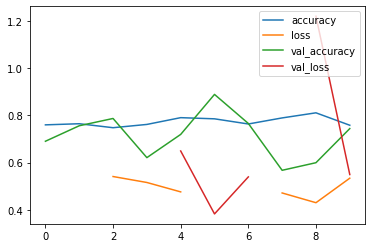

In [16]:
# hist의 accuracy plt의 plot을 이용하여 출력하는 코드.
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend(loc='upper right')
plt.show()

In [17]:
# 로드한 모델을 test 데이터로 평가해보세요.
loss, acc = model2.evaluate(test)
print(loss, acc)

102/102 [==============================] - 814s 7s/step - loss: 0.4911 - accuracy: 0.7883
0.49110737442970276 0.7883076667785645


In [18]:
result = model2.predict(test)
result

array([[0.       , 2.4173007],
       [0.       , 3.2356315],
       [0.       , 2.4772215],
       ...,
       [0.       , 3.20096  ],
       [0.       , 2.5208082],
       [0.       , 0.       ]], dtype=float32)

In [20]:
result[0]

array([0.       , 2.4173007], dtype=float32)

In [25]:
features, label = iter(test).next()
print("example features:", features[0])
print("example label:", label[0])

example features: tf.Tensor(
[[[231.71436  245.52544  236.30083 ]
  [186.78069  194.67842  187.40924 ]
  [158.7209   158.01973  153.7541  ]
  ...
  [133.6582   127.17578  129.66992 ]
  [133.6582   127.17578  129.66992 ]
  [133.6582   127.17578  129.66992 ]]

 [[199.22916  213.05888  203.94986 ]
  [ 59.522522  62.298813  56.736313]
  [ 28.226303  14.845642  15.097794]
  ...
  [ 41.22461    3.953125  13.341797]
  [ 41.22461    3.953125  13.341797]
  [ 41.22461    3.953125  13.341797]]

 [[224.65912  208.09435  209.75574 ]
  [ 55.895523  24.180649  27.73146 ]
  [ 64.46286    4.452484  19.186508]
  ...
  [122.80469   10.509766  50.941406]
  [122.80469   10.509766  50.941406]
  [122.80469   10.509766  50.941406]]

 ...

 [[219.54688  219.54688  219.54688 ]
  [ 23.820312  23.820312  23.820312]
  [104.375    104.375    104.375   ]
  ...
  [225.0625   216.97528  252.25685 ]
  [224.6539   221.08183  250.05254 ]
  [226.57298  226.86719  251.19727 ]]

 [[219.54688  219.54688  219.54688 ]
  [ 23.8

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


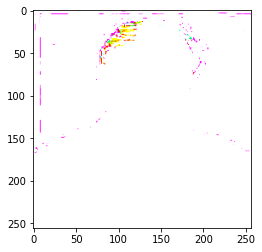

In [30]:
plt.imshow(features[0])

In [31]:
X_train, y_train = iter(train).next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


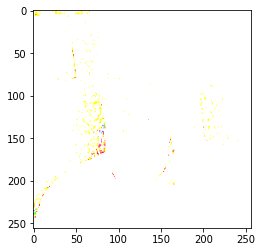

In [32]:
plt.imshow(X_train[0])

## ResNet을 활용한 모델링

In [18]:
from tensorflow.keras.applications import ResNet50
from keras.layers import GlobalAveragePooling2D
from keras.models import Model

resnet = ResNet50(weights='imagenet', include_top=False)

# ResNet50 레이어의 파라미터가 업데이트 되지 않도록 설정한다
for layer in resnet.layers:
    layer.trainable = False

x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(2, activation='sigmoid')(x)
model3 = Model(resnet.input, predictions)
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_4[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                           

In [22]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model3.fit(train, validation_data=val, epochs=10)

Epoch 1/10
317/317 [==============================] - 1177s 3s/step - loss: 0.3614 - accuracy: 0.8615 - val_loss: 0.3123 - val_accuracy: 0.8774
Epoch 2/10
317/317 [==============================] - 95s 297ms/step - loss: 0.2381 - accuracy: 0.9029 - val_loss: 0.3858 - val_accuracy: 0.8366
Epoch 3/10
317/317 [==============================] - 93s 291ms/step - loss: 0.1980 - accuracy: 0.9172 - val_loss: 0.4497 - val_accuracy: 0.8206
Epoch 4/10
317/317 [==============================] - 93s 291ms/step - loss: 0.1714 - accuracy: 0.9323 - val_loss: 0.3751 - val_accuracy: 0.8551
Epoch 5/10
317/317 [==============================] - 94s 294ms/step - loss: 0.1469 - accuracy: 0.9420 - val_loss: 0.7242 - val_accuracy: 0.7232
Epoch 6/10
317/317 [==============================] - 94s 292ms/step - loss: 0.1144 - accuracy: 0.9564 - val_loss: 0.4382 - val_accuracy: 0.8473
Epoch 7/10
317/317 [==============================] - 93s 289ms/step - loss: 0.0929 - accuracy: 0.9660 - val_loss: 0.3950 - val_acc

In [23]:
model3.save('model3.h5')

In [24]:
# 모델을 내 컴퓨터에 저장해보세요.
from google.colab import files
files.download('./model3.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# 모델을 로드하는 코드를 작성하세요.

model3 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/data/face_age_detection/model3.h5')

# 최종 모델 평가

## Young (17-22세)를 제외한 나이대 데이터 평가

In [97]:
# 로드한 모델을 test 데이터로 평가.
loss, acc = model3.evaluate(test)
print(loss, acc)

97/97 [==============================] - 12s 119ms/step - loss: 0.3924 - accuracy: 0.8801
0.3924315571784973 0.8801292181015015


## Young (17-22세) 데이터 평가

In [96]:
# 로드한 모델을 test 데이터로 평가.
loss, acc = model3.evaluate(test_young)
print(loss, acc)

5/5 [==============================] - 1s 131ms/step - loss: 1.3631 - accuracy: 0.7032
1.363072156906128 0.7032257914543152


## 가설 
### 가설 설정 
20세를 기준으로 Kid, Adult를 분류할 때, 20세와 근접한 나이대 (17-22세)의 경우 정확도가 떨어질 것이다. 

### 가설 검정 
- 17-22세 데이터를 제외한 경우 정확도 0.88
- 17-22세 데이터를 사용한 경우 정확도 0.70
- 즉, 가설이 사실이다. 

## 어르신 사진으로 predict

In [15]:
import matplotlib.pyplot as plt

grandma = plt.imread('/content/drive/MyDrive/Colab Notebooks/data/face_age_detection/grandma.jpeg')

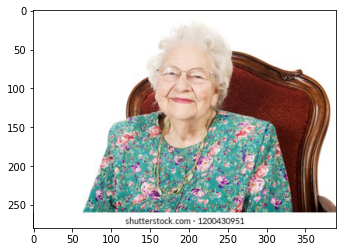

In [76]:
plt.imshow(grandma)

In [77]:
grandma.shape

(280, 390, 3)

In [16]:
img_array_grandma = keras.preprocessing.image.img_to_array(grandma)
img_array_grandma = tf.expand_dims(img_array_grandma, 0)

In [17]:
predictions_grandma = model3.predict(img_array_grandma)
predictions_grandma

array([[0.01470846, 0.98773766]], dtype=float32)

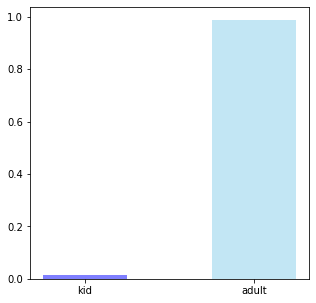

In [33]:
class_labels = ['kid', 'adult']
colors = ['blue', 'skyblue']

plt.figure(figsize=(5,5))
plt.bar(class_labels,predictions_grandma[0], width=0.5, color=colors, alpha=0.5)
plt.show()

## Baby 사진으로 predict

In [8]:
import matplotlib.pyplot as plt

baby = plt.imread('/content/drive/MyDrive/Colab Notebooks/data/face_age_detection/baby.jpeg')

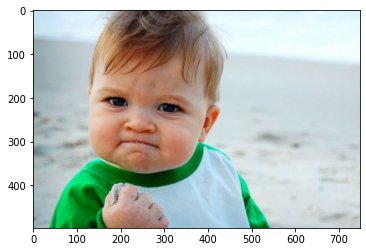

In [9]:
plt.imshow(baby)

In [10]:
img_array_baby = keras.preprocessing.image.img_to_array(baby)
img_array_baby = tf.expand_dims(img_array_baby, 0)

predictions_baby = model3.predict(img_array_baby)
predictions_baby

array([[0.9815625 , 0.02524024]], dtype=float32)

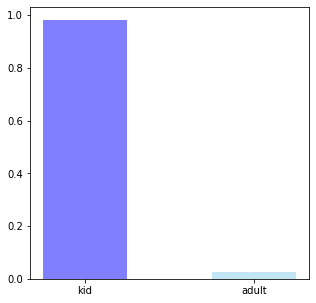

In [34]:
class_labels = ['kid', 'adult']

plt.figure(figsize=(5,5))
plt.bar(class_labels, predictions_baby[0], width=0.5, color=colors, alpha=0.5)
plt.show()

## IU 사진으로 predict

In [21]:
import matplotlib.pyplot as plt

iu = plt.imread('/content/drive/MyDrive/Colab Notebooks/data/face_age_detection/iu.jpeg')

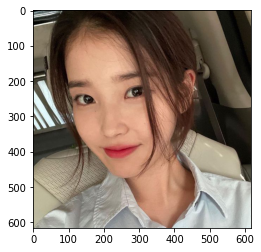

In [22]:
plt.imshow(iu)

In [23]:
img_array_iu = keras.preprocessing.image.img_to_array(iu)
img_array_iu = tf.expand_dims(img_array_iu, 0)

predictions_iu = model3.predict(img_array_iu)
predictions_iu

array([[0.41355437, 0.5728216 ]], dtype=float32)

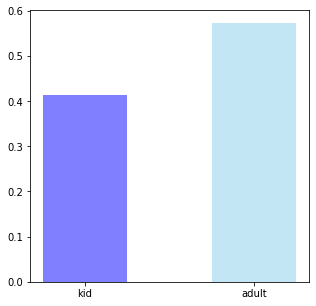

In [35]:
class_labels = ['kid', 'adult']

plt.figure(figsize=(5,5))
plt.bar(class_labels, predictions_iu[0], width=0.5, color=colors, alpha=0.5)
plt.show()